**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Import data

In [2]:
txt_fdiry = file.path(
    FD_RES, 
    "analysis_umap_cluster_by_coverage_score", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = "matrix.merge.encode_chipseq_full_log2p.fcc_zscore.tss.encode_chromatin_states.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

mat_region_annot = dat
print(dim(dat))
head(dat)

[1] 150041    555


Region,H2AFZ,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,⋯,PLS,Quies,ReprPC,Tss,TssFlnk,TssFlnkD,TssFlnkU,Tx,TxWk,ZNF/Rpts
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:100028014-100029653,0.93242936,1.202217,0.3674175,1.1781314,1.510638,0.6818927,0.5918414,0.3212089,1.029037,⋯,0,1,0,0,0,0,0,0,0,0
chr1:100036895-100039189,2.89957396,3.910099,0.4091536,1.1978119,1.069881,4.9478111,5.5219678,4.1772959,4.663171,⋯,1,0,0,1,0,0,1,0,0,0
chr1:100046252-100046533,0.04290946,1.091537,0.4388560,0.5386822,2.148905,1.2418524,1.1294906,3.5795422,1.101003,⋯,0,1,0,0,0,0,0,0,1,0
chr1:100048290-100048918,0.50936952,1.485267,0.5898186,1.1814556,1.987656,1.4118059,0.9708391,3.5167590,1.229560,⋯,0,1,0,0,0,0,0,0,1,0
chr1:100050225-100050529,0.85668617,1.725008,0.2278687,1.9307771,1.923699,1.8979684,1.0077673,3.0457400,1.339075,⋯,0,0,0,0,0,0,0,1,0,0
chr1:100064757-100065161,0.42353622,1.240632,0.4025945,1.5630312,1.592914,0.5568443,0.7069882,1.2316843,1.420641,⋯,0,0,0,0,0,0,0,1,0,0


In [3]:
txt_fdiry = file.path(
    FD_RES, 
    "analysis_umap_cluster_by_coverage_score", 
    "fcc_astarr_macs_input_overlap",
    "fcc_starrmpracrispri_vote2",
    "cluster_phenograph"
)
txt_fname = "cluster.neighbors_070.coverage.encode_chipseq_full_log2p.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_cluster = dat
print(dim(dat))
head(dat)

[1] 18341     2


Cluster,Region
<dbl>,<chr>
0,chr1:100036895-100039189
0,chr1:100132375-100133491
0,chr1:100265562-100266994
13,chr1:10032429-10033763
0,chr1:100362769-100363401
1,chr1:100400445-100400762


In [4]:
txt_fdiry = file.path(
    FD_RES, 
    "analysis_umap_cluster_by_coverage_score", 
    "fcc_astarr_macs_input_overlap",
    "fcc_starrmpracrispri_vote2",
    "umap"
)
txt_fname = "umap.metric_euclidean.neighbors_070.coverage.encode_chipseq_full_log2p.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_umap = dat
print(dim(dat))
head(dat)

[1] 33953     3


UMAP1,UMAP2,Region
<dbl>,<dbl>,<chr>
7.761389,5.123120,chr1:100036895-100039189
8.937765,5.504427,chr1:100132375-100133491
7.081500,5.860942,chr1:100248956-100250290
7.489602,5.386488,chr1:100265562-100266994
9.208714,4.615319,chr1:10032429-10033763
7.761508,4.751110,chr1:100351018-100353268


In [5]:
dat = dat_region_cluster
table(dat$Cluster)


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14 
4629 2508 2341 2301 1876 1087  846  557  480  464  404  333  211  166  138 

In [6]:
dat = dat_region_cluster
dat = dat %>% dplyr::left_join(dat_region_umap,  by = "Region")
dat = dat %>% dplyr::left_join(mat_region_annot, by = "Region")
dat = dat %>% dplyr::mutate(Cluster = as.character(Cluster))

dat_region_merge = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 18341   558


Cluster,Region,UMAP1,UMAP2,H2AFZ,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me1,H3K9me3,H4K20me1,ADNP,AFF1,AFF4,AGO1,ARHGAP35,ARID1B,ARID2,ARID3A,ARID3B,ARID4B,ARNT,ASH1L,ATF1,ATF2,ATF3,ATF4,ATF6,ATF7,BACH1,BCL6,BCLAF1,BCOR,BDP1,BHLHE40,BMI1,BRCA1,BRD4,BRD9,BRF2,C11orf30,CAMTA2,CBFA2T2,CBFA2T3,CBFB,CBX1,CBX2,CBX3,CBX5,CC2D1A,CCAR2,CDC5L,CEBPB,CEBPG,CEBPZ,CGGBP1,CHAMP1,CHCHD3,CHD1,CHD2,CHD4,CHD7,CLOCK,COPS2,CREB1,CREB3,CREB3L1,CREB5,CREBBP,CREM,CSDE1,CTBP1,CTCF,CTCFL,CUX1,CXXC5,DACH1,DDIT3,DDX20,DEAF1,DIDO1,DLX4,DMBX1,DMTF1,DNMT1,DPF2,E2F1,E2F3,E2F4,E2F5,E2F6,E2F7,E2F8,E4F1,EGR1,EHMT2,ELF1,ELF2,ELF4,ELK1,ELK3,EP300,EP400,ERF,ESRRA,ESRRB,ETS1,ETS2,ETV1,ETV5,ETV6,EWSR1,EZH2,FIP1L1,FOSL1,FOXA1,FOXA3,FOXJ2,FOXJ3,FOXK1,FOXK2,FOXM1,FOXO4,FOXP1,FOXP4,FUS,GABPA,GABPB1,GABPB2,GATA1,GATA2,GATAD2A,GATAD2B,GMEB1,GTF2A2,GTF2E2,GTF2F1,GTF2I,HBP1,HCFC1,HDAC1,HDAC2,HDAC3,HDAC6,HDAC8,HDGF,HES1,HEY1,HINFP,HIVEP1,HLTF,HMBOX1,HMG20A,HMG20B,HMGXB4,HNRNPH1,HNRNPK,HNRNPL,HNRNPLL,HNRNPUL1,HOMEZ,HOXB6,HSF4,ID3,IFI16,IKZF1,ILF3,ILK,IRF1,IRF2,IRF9,JUN,JUNB,JUND,KAT2B,KAT7,KAT8,KDM1A,KDM2B,KDM4B,KDM5B,KHSRP,KLF1,KLF10,KLF13,KLF16,KLF6,L3MBTL2,LCOR,LEF1,MAFF,MAFG,MAFK,MAX,MAZ,MBD1,MBD2,MCM2,MCM3,MCM5,MCM7,MECOM,MED1,MEF2A,MEF2D,MEIS2,MGA,MIER1,MITF,MLLT1,MLX,MNT,MTA1,MTA2,MTA3,MTF1,MXD1,MXI1,MYBL2,MYC,MYNN,NBN,NCOA1,NCOA2,NCOA4,NCOA6,NCOR1,NELFE,NEUROD1,NFATC3,NFE2,NFE2L1,NFIC,NFIX,NFRKB,NFXL1,NFYA,NKRF,NONO,NR0B1,NR1H2,NR2C1,NR2C2,NR2F1,NR2F2,NR2F6,NR3C1,NR4A1,NRF1,NUFIP1,OTX1,PATZ1,PBX2,PCBP1,PCBP2,PHB,PHB2,PHF20,PHF21A,PHF8,PHTF2,PKNOX1,PML,POLR2A,POLR2AphosphoS2,POLR2AphosphoS5,POLR2B,POLR2G,POLR2H,POU5F1,PPARD,PRDM10,PREB,PRMT5,PRPF4,PTBP1,PTRF,PTTG1,PURB,PYGO2,RAD21,RAD51,RB1,RBBP5,RBFOX2,RBM14,RBM15,RBM17,RBM22,RBM25,RBM34,RBM39,RBPJ,RCOR1,RELA,RERE,REST,RFX1,RFX5,RFX7,RHOXF2B,RLF,RNF2,RNF219,RREB1,RUNX1,SAFB,SAFB2,SAP30,SETDB1,SFPQ,SIN3A,SIN3B,SIRT6,SIX5,SKIL,SLC30A9,SMAD1,SMAD2,SMAD3,SMAD4,SMAD5,SMARCA4,SMARCA5,SMARCB1,SMARCC2,SMARCE1,SMC3,SNAPC5,SNIP1,SNRNP70,SOX6,SP1,SPI1,SREBF1,SREBF2,SRF,SRSF1,SRSF3,SRSF7,SRSF9,STAG1,STAT5A,STAT5B,STAT6,SUPT5H,SUZ12,TAF15,TAF7,TAF9B,TAL1,TARDBP,TBL1XR1,TBPL1,TBX18,TCF12,TCF15,TCF3,TCF7,TCF7L2,TCFL5,TEAD1,TEAD2,TEAD4,TFAM,TFAP4,TFCP2,TFDP1,TFE3,TGIF2,THAP1,THAP12,THAP7,THRA,THRAP3,THRB,TOE1,TRIM24,TRIM25,TRIM28,TRIP13,TSC22D4,TSHZ1,U2AF1,U2AF2,UBTF,USF1,USF2,VEZF1,WHSC1,XRCC3,XRCC5,YBX1,YBX3,YY1,ZBED1,ZBTB1,ZBTB11,ZBTB12,ZBTB17,ZBTB2,ZBTB26,ZBTB33,ZBTB34,ZBTB40,ZBTB43,ZBTB49,ZBTB5,ZBTB7A,ZBTB8A,ZBTB9,ZC3H11A,ZC3H4,ZC3H8,ZEB2,ZFP1,ZFP30,ZFP36,ZFP91,ZFPM2,ZFX,ZHX1,ZKSCAN1,ZKSCAN3,ZKSCAN8,ZMIZ1,ZMYM3,ZNF12,ZNF121,ZNF124,ZNF133,ZNF134,ZNF140,ZNF143,ZNF146,ZNF148,ZNF165,ZNF174,ZNF175,ZNF184,ZNF197,ZNF212,ZNF215,ZNF217,ZNF224,ZNF23,ZNF232,ZNF239,ZNF24,ZNF253,ZNF257,ZNF263,ZNF274,ZNF277,ZNF280A,ZNF280B,ZNF281,ZNF282,ZNF3,ZNF311,ZNF316,ZNF317,ZNF318,ZNF319,ZNF324,ZNF347,ZNF354B,ZNF354C,ZNF384,ZNF395,ZNF397,ZNF398,ZNF407,ZNF408,ZNF41,ZNF431,ZNF436,ZNF444,ZNF445,ZNF449,ZNF507,ZNF511,ZNF512,ZNF518B,ZNF551,ZNF561,ZNF57,ZNF583,ZNF584,ZNF586,ZNF589,ZNF592,ZNF609,ZNF639,ZNF644,ZNF655,ZNF668,ZNF695,ZNF696,ZNF699,ZNF7,ZNF700,ZNF707,ZNF717,ZNF740,ZNF75A,ZNF76,ZNF764,ZNF766,ZNF77,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3,ASTARR,CRISPRi-Growth,CRISPRi-HCRFF,LMPRA,TMPRA,WSTARR,TSS,Chrom,ChromStart,ChromEnd,Biv,CA-CTCF,CA-H3K4me3,CA-only,CA-TF,dELS,Enh1,Enh2,EnhG1,EnhG2,Het,Low-DNase,pELS,PLS,Quies,ReprPC,Tss,TssFlnk,TssFlnkD,TssFlnkU,Tx,TxWk,ZNF/Rpts
0,chr1:100036895-100039189,7.761389,5.123120,2.899574,3.910099,0.4091536,1.1978119,1.0698812,4.947811,5.521968,4.177296,4.663171,0.9431997,1.0519150,1.0336661,0.8387033,1.457639,1.609178,1.7338793,0.9886447,1.112533,1.243505,1.465525,1.044772,1.485782,1.169709,1.036489,1.662089,0.9184763,1.057931,1.192358,1.644322,1.508190,1.513794,0.8523952,1.1376631,1.452943,0.6316733,2.216002,0.8199158,0.7574031,2.103209,1.441627,0.7691607,0.9433415,1.3818149,0.8906187,0.9048694,1.530710,1.631384,0.5434791,1.391589,1.124699,1.212843,0.9095596,1.12

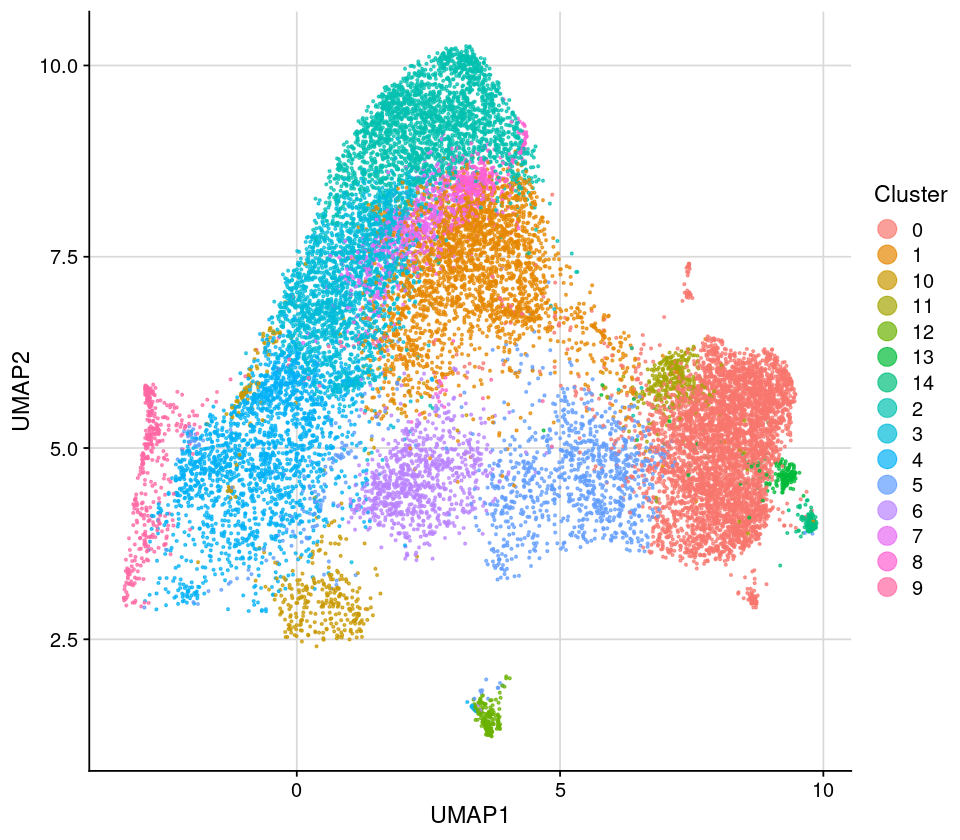

In [7]:
theme_legend = guides(colour = guide_legend(override.aes = list(size=5)))

dat = dat_region_merge
gpt = ggplot(dat, aes(x=UMAP1, y=UMAP2, color = Cluster)) + 
    geom_point(size=0.5, alpha = 0.7) + 
    theme_cowplot() +
    background_grid() +
    theme_legend

options(repr.plot.height = 7, repr.plot.width = 8)
print(gpt)

In [8]:
dat = dat_region_cluster
head(dat)

Cluster,Region
<dbl>,<chr>
0,chr1:100036895-100039189
0,chr1:100132375-100133491
0,chr1:100265562-100266994
13,chr1:10032429-10033763
0,chr1:100362769-100363401
1,chr1:100400445-100400762


In [9]:
dat = dat_region_cluster
dat = dat %>% dplyr::left_join(dat_region_umap,  by = "Region")
dat = dat %>% dplyr::mutate(Cluster = str_pad(Cluster, width = 2, pad = "0"))
dat = dat %>% dplyr::mutate(Cluster = paste0("Cluster", Cluster))
dat = dat %>% dplyr::mutate(Cluster = as.character(Cluster))

dat_region_merge = dat
head(dat)

Cluster,Region,UMAP1,UMAP2
<chr>,<chr>,<dbl>,<dbl>
Cluster00,chr1:100036895-100039189,7.761389,5.123120
Cluster00,chr1:100132375-100133491,8.937765,5.504427
Cluster00,chr1:100265562-100266994,7.489602,5.386488
Cluster13,chr1:10032429-10033763,9.208714,4.615319
Cluster00,chr1:100362769-100363401,5.600899,6.791666
Cluster01,chr1:100400445-100400762,1.977909,7.495390


In [10]:
vec_txt_cluster = sort(unique(dat_region_merge$Cluster))

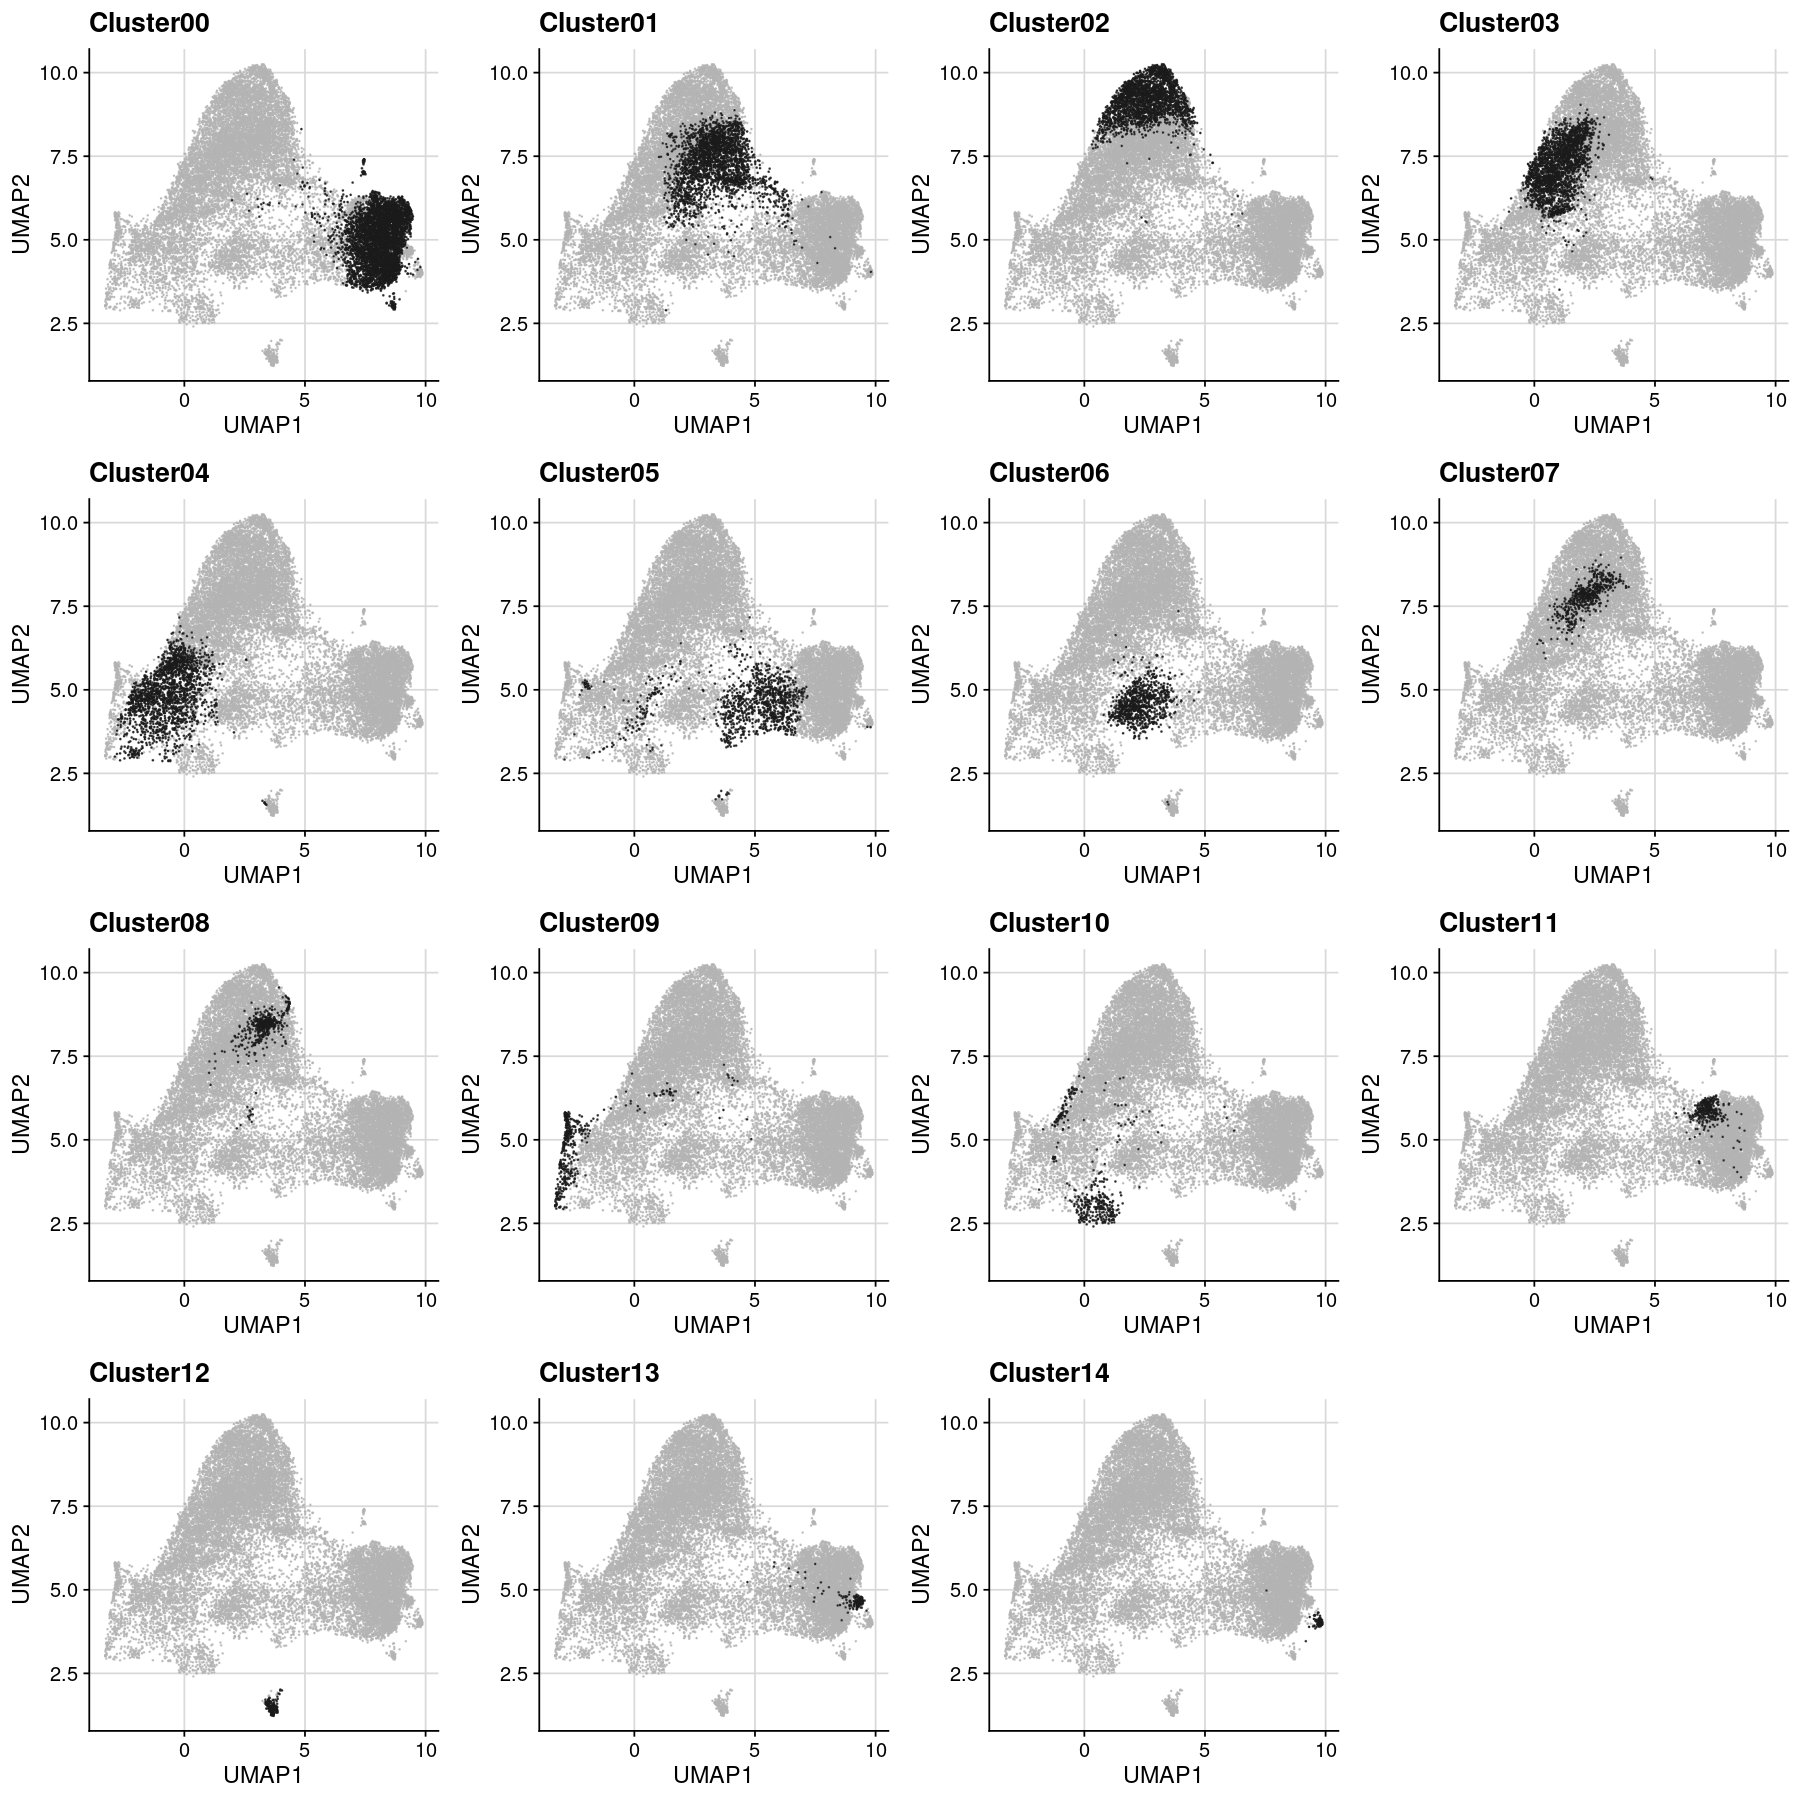

In [16]:
lst = lapply(vec_txt_cluster, function(txt_cluster){
    dat = dat_region_merge
    tmp = dat %>% dplyr::filter(Cluster == txt_cluster)
    gpt = ggplot() + 
        geom_point(data = dat, aes(x=UMAP1, y=UMAP2), color = "grey70", size = 0.1, alpha = 0.7) + 
        geom_point(data = tmp, aes(x=UMAP1, y=UMAP2), color = "grey10", size = 0.1, alpha = 0.7) + 
        theme_cowplot() +
        background_grid() +
        labs(title = txt_cluster)
    return(gpt)
})

options(repr.plot.height = 15, repr.plot.width = 15)
plot_grid(plotlist = lst, nrow = 4, ncol = 4)

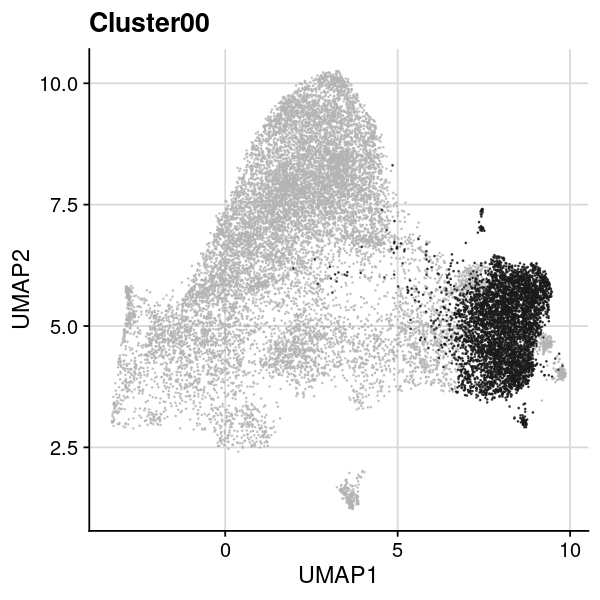

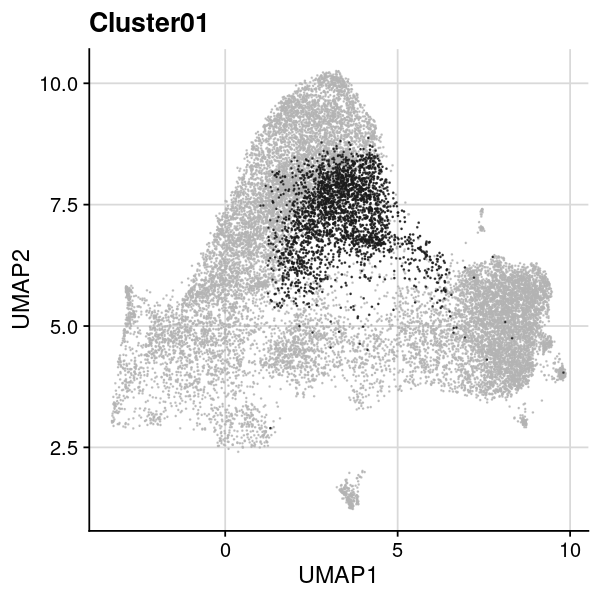

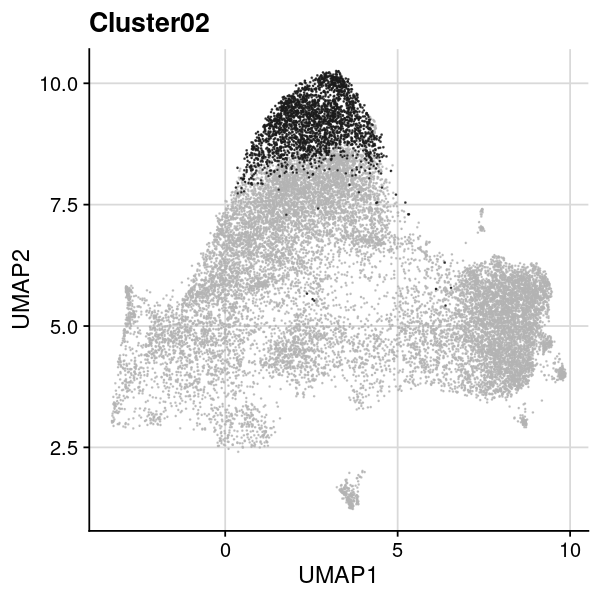

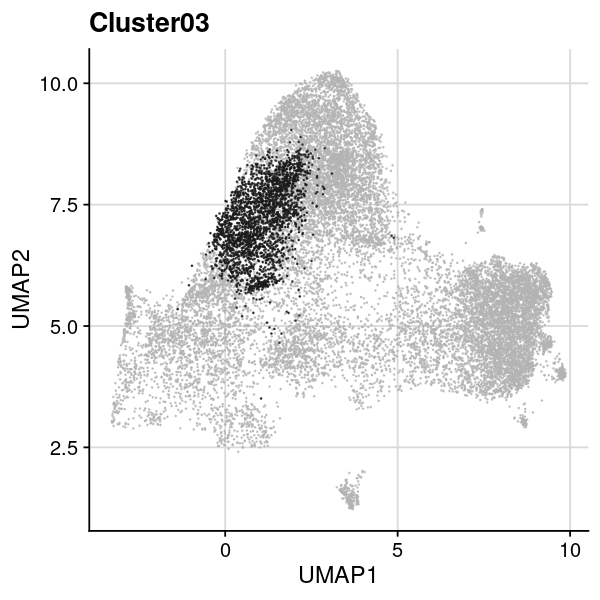

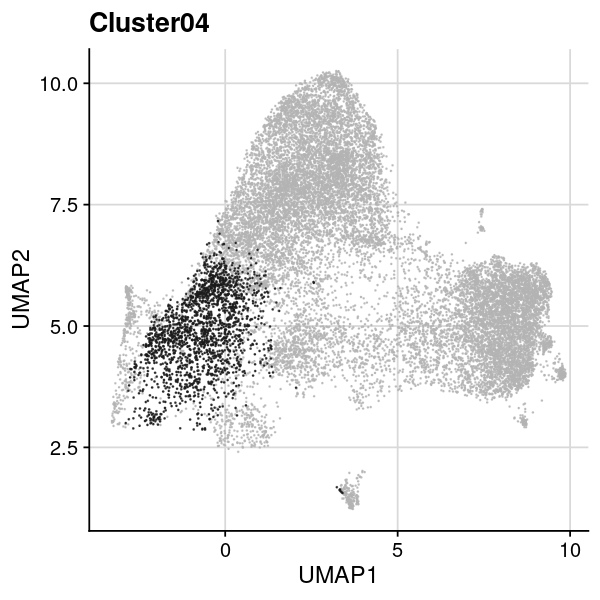

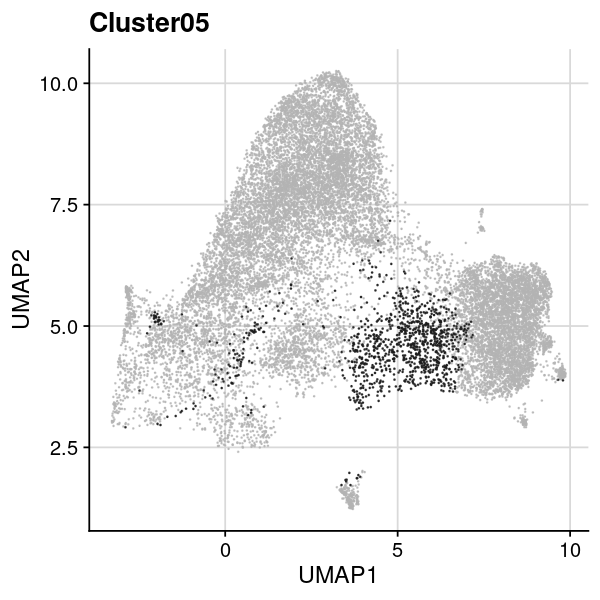

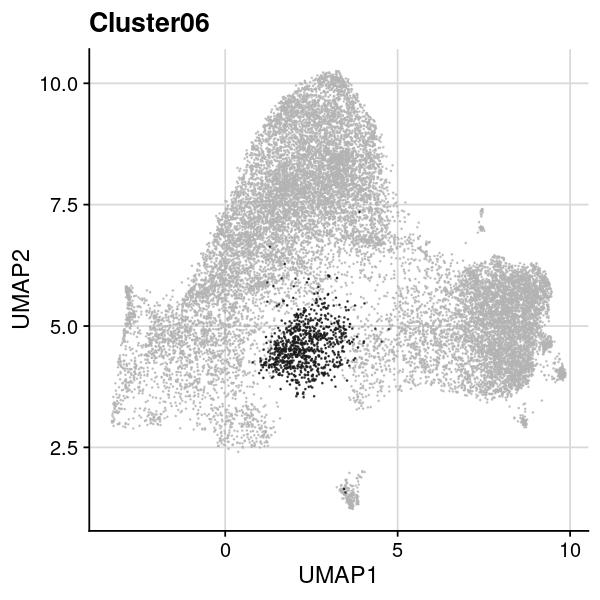

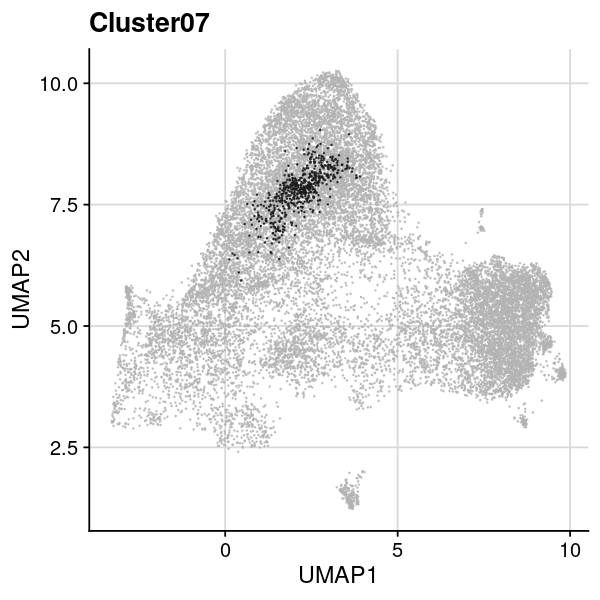

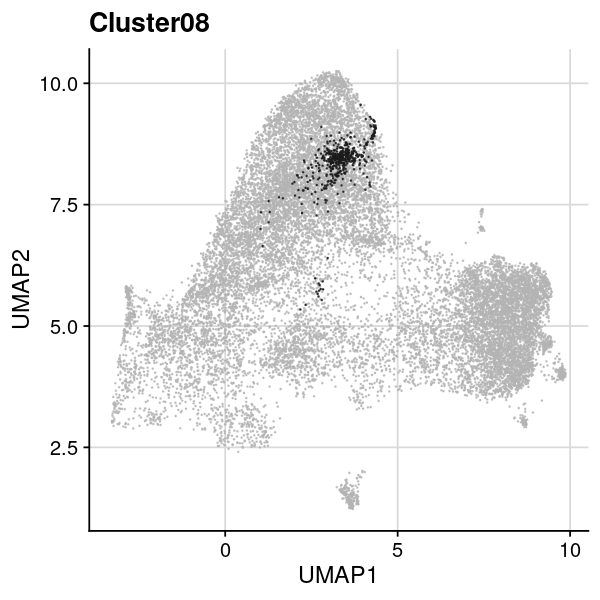

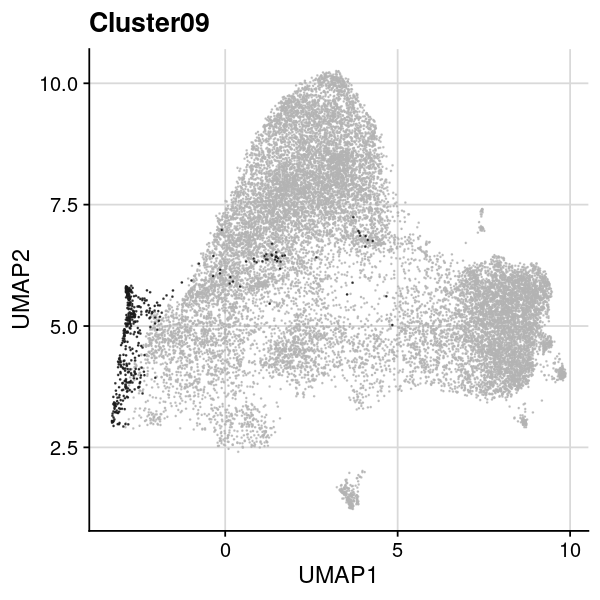

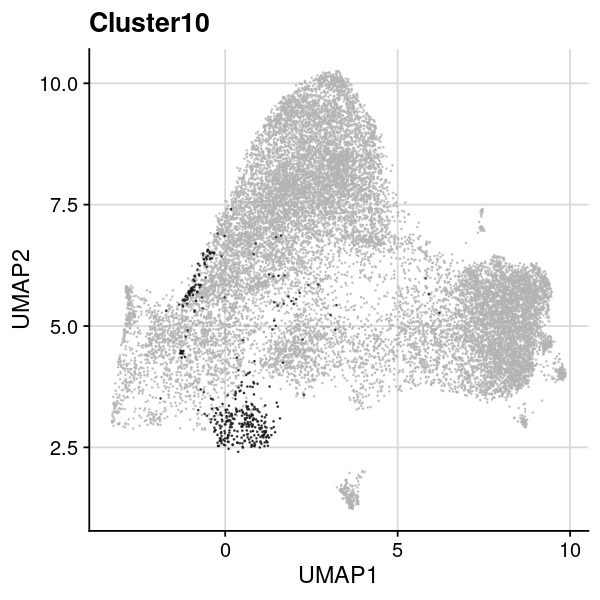

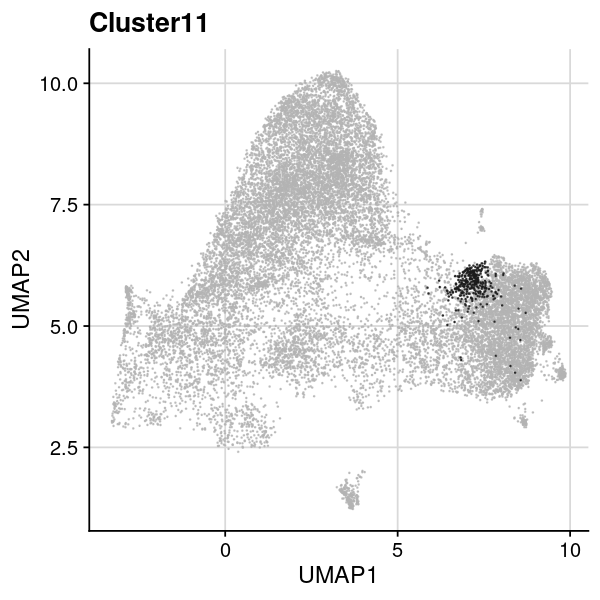

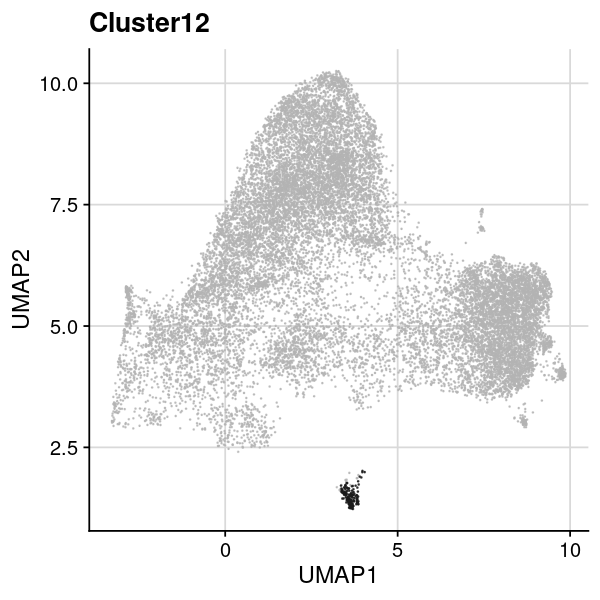

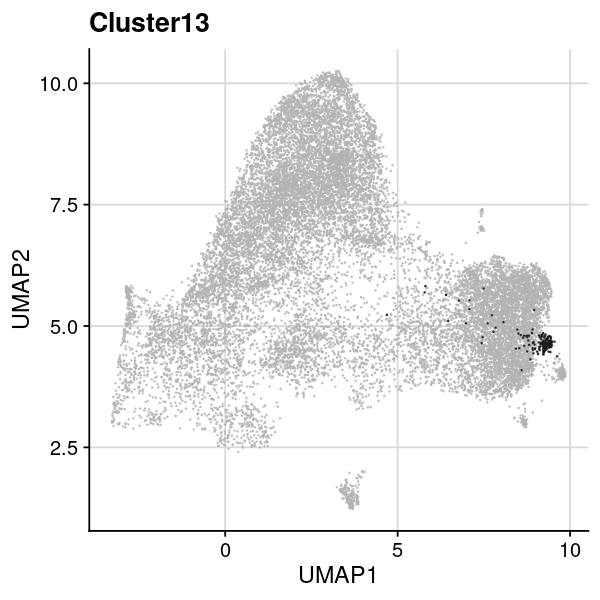

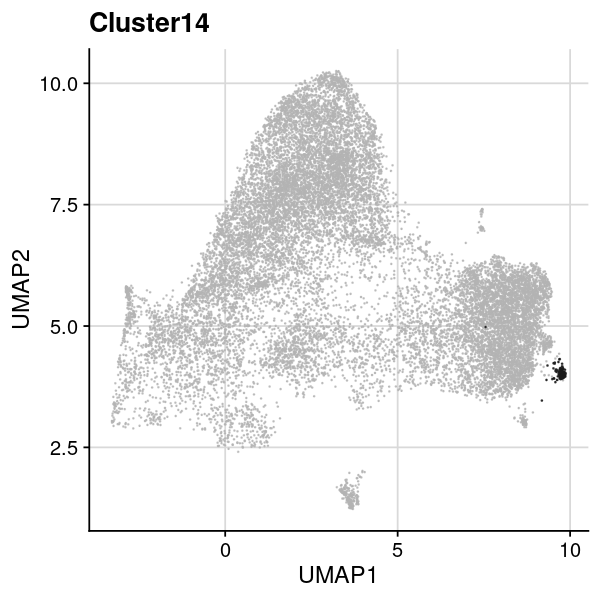

In [17]:
options(repr.plot.height = 5, repr.plot.width = 5)
for (gpt in lst){print(gpt)}